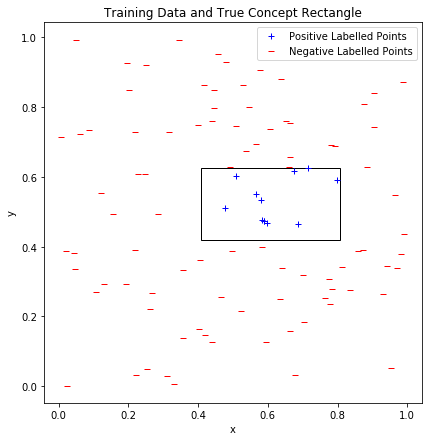

In [1]:
import numpy as np

#True Concept
l,r=np.random.uniform(0,1,2)
if l>r:
    r,l=l,r  
t,b=np.random.uniform(0, 1,2)
if b>t:
    b,t=t,b

#Function to label points with respect to a rectangle
def label_points_wrt_rectangle(coordinate_1,coordinate_2,l,r,b,t):
    positive_labels=[]
    negative_labels=[]
    for c1,c2 in zip(coordinate_1,coordinate_2):
        if c1 >= l and c1 <= r and c2 >= b and c2 <= t:
            positive_labels.append((c1,c2))
        else:
            negative_labels.append((c1,c2))
    return positive_labels,negative_labels

#Get x,y coordinates for positive and negative points
def get_x_y_coordinates(positive_labels,negative_labels):
    if len(positive_labels)==0:
        x1_pos,x2_pos=np.array([]),np.array([])
    else:
        x1_pos,x2_pos=np.array(positive_labels).T
        
    if len(negative_labels)==0:
        x1_neg,x2_neg=np.array([]),np.array([])
    else:
        x1_neg,x2_neg=np.array(negative_labels).T
        
    return x1_pos,x2_pos,x1_neg,x2_neg

#Algorithm-1
#Finding the largest rectangle without '-' labelled points
def find_largest_rectangle(x1_neg,x2_neg,l,r,b,t):
    try:
        l_largest=max(x for x,y in zip(x1_neg,x2_neg) if x < l and b<=y and y<=t)
    except:
        l_largest=0
    try:   
        r_largest=min(x for x,y in zip(x1_neg,x2_neg) if x > r and b<=y and y<=t)
    except:
        r_largest=1
    try:
        b_largest=max(y for x,y in zip(x1_neg,x2_neg) if y < b and l<=x and x<=r)
    except:
        b_largest=0
    try:
        t_largest=min(y for x,y in zip(x1_neg,x2_neg) if y > t and l<=x and x<=r)
    except:
        t_largest=1
    
    return l_largest,r_largest,b_largest,t_largest

#100 Training Points
coordinate_1=np.random.uniform(0, 1,100)
coordinate_2=np.random.uniform(0, 1,100)

#Labelling the Training Points with true Concept l,r,b,t
positive_labels,negative_labels=label_points_wrt_rectangle(coordinate_1,coordinate_2,l,r,b,t)
x1_pos,x2_pos,x1_neg,x2_neg =get_x_y_coordinates(positive_labels,negative_labels)

#Plotting True Concept and Training Data
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(111, aspect='equal')
ax2.add_patch(
    patches.Rectangle(
        (l, b),
        r-l,
        t-b,
        fill=False      # remove background
    )
)
ax2.plot(x1_pos,x2_pos,'b+',x1_neg,x2_neg,'r_')
plt.title('Training Data and True Concept Rectangle')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Positive Labelled Points','Negative Labelled Points'])

Note: Only false positives occur as error in this Classification
Number of false positives: 15
Error from largest rectangle(Algorithm-1) for Test points: 0.15


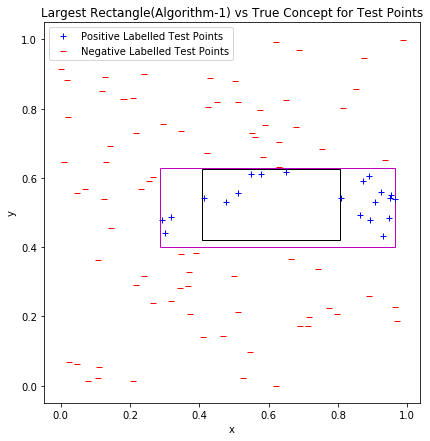

In [2]:
#Algorithm-1
#Finding the largest rectangle without '-' labelled points
l_largest,r_largest,b_largest,t_largest=find_largest_rectangle(x1_neg,x2_neg,l,r,b,t)

#100 Test Points
coordinate_1_test=np.random.uniform(0, 1,100)
coordinate_2_test=np.random.uniform(0, 1,100)

#find Labels of the test points using the Algorithm-1
positive_labels_test,negative_labels_test=label_points_wrt_rectangle(coordinate_1_test,coordinate_2_test,l_largest,r_largest,b_largest,t_largest)
x1_pos_test,x2_pos_test,x1_neg_test,x2_neg_test =get_x_y_coordinates(positive_labels_test,negative_labels_test)

#Plotting Algorithm 1 vs True Concept for Test Points
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(111, aspect='equal')

#True Concept
ax2.add_patch(
    patches.Rectangle(
        (l, b),
        r-l,
        t-b,
        fill=False,# remove background
    )
)

#Algorithm-1 Rectangle
ax2.add_patch(
    patches.Rectangle(
        (l_largest, b_largest),
        r_largest-l_largest,
        t_largest-b_largest,
        fill=False, # remove background
        color='m'
    )
)
ax2.plot(x1_pos_test,x2_pos_test,'b+',x1_neg_test,x2_neg_test,'r_')
plt.title('Largest Rectangle(Algorithm-1) vs True Concept for Test Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Positive Labelled Test Points','Negative Labelled Test Points'])

#Test Error
#True Labels for Test points
positive_labels_true,negative_labels_true=label_points_wrt_rectangle(coordinate_1_test,coordinate_2_test,l,r,b,t)

print('Note: Only false positives occur as error in this Classification')
false_positives=(len(positive_labels_test)-len(positive_labels_true))
print('Number of false positives:',false_positives)

error=(false_positives)/100.0
print('Error from largest rectangle(Algorithm-1) for Test points:',error)

In [3]:
def get_test_error_list(N,T):
    test_errors=[]
    for i in range(1,T+1):
        #N Training Points
        coordinate_1=np.random.uniform(0, 1,N)
        coordinate_2=np.random.uniform(0, 1,N)

        #Labelling the Training Points with true Concept l,r,b,t
        positive_labels,negative_labels=label_points_wrt_rectangle(coordinate_1,coordinate_2,l,r,b,t)
        x1_pos,x2_pos,x1_neg,x2_neg =get_x_y_coordinates(positive_labels,negative_labels)

        #Algorithm-1
        #Finding the largest rectangle without including '-' labelled points
        l_largest,r_largest,b_largest,t_largest=find_largest_rectangle(x1_neg,x2_neg,l,r,b,t)

        #N Test Points
        coordinate_1_test=np.random.uniform(0, 1,N)
        coordinate_2_test=np.random.uniform(0, 1,N)

        #find Labels of the test points using the Algorithm-1
        positive_labels_test,negative_labels_test=label_points_wrt_rectangle(coordinate_1_test,coordinate_2_test,l_largest,r_largest,b_largest,t_largest)

        #Test Error
        #True Labels for Test points
        positive_labels_true,negative_labels_true=label_points_wrt_rectangle(coordinate_1_test,coordinate_2_test,l,r,b,t)

        #print('Only false positives Exist in this Classification')
        false_positives=(len(positive_labels_test)-len(positive_labels_true))
        #print('Number of false positives:',false_positives)

        error=((false_positives))/float(N)
        #print('Error for largest rectangle:',error)

        test_errors.append(error)
        
    return test_errors

import math
def generalization_bound(N):
    e=2.7182
    delta=0.01
    d=4.0
    r_sf=0
    rf=r_sf+math.sqrt((2.0*d*math.log((e*N)/d))/N)+math.sqrt(math.log(1.0/delta)/(2*N))
    return rf

Theoritical bound for error for N= 100 is 0.7326968055418672
99 percentile of histogram for N= 100 is 0.1201
99 percentile of histogram for N=100 is smaller than theoretical bound


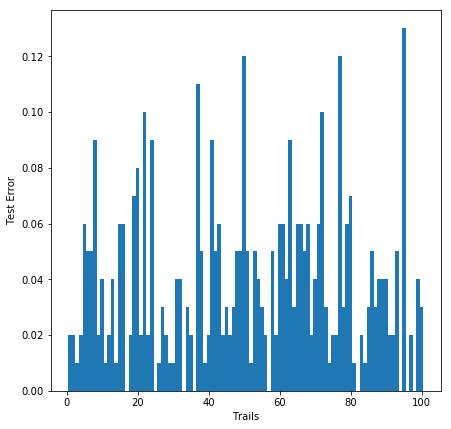

In [4]:
#calculate testerror for 100 Trails
N=100
T=100
test_errors=get_test_error_list(N,T)

%matplotlib inline
plt.figure(figsize=(7,7))
plt.bar(left=range(1,T+1),height=test_errors, width=1)
plt.ylabel('Test Error')
plt.xlabel('Trails')

rf=generalization_bound(N)
print('Theoritical bound for error for N=',N,'is',rf)

#99 percentile of histogram
print('99 percentile of histogram for N=',N,'is',np.percentile(np.array(test_errors),q=99.0))
print("99 percentile of histogram for N=100 is smaller than theoretical bound")

In [5]:
#calculate testerror for 200 Trails
N=200
T=100
test_errors=get_test_error_list(N,T)

rf=generalization_bound(N)
print('theoritical error for N=',N,'is',rf)

#99 percentile of histogram
print('99 percentile of histogram for N=',N,'is',np.percentile(np.array(test_errors),q=99.0))
print("99 percentile of histogram for N=200 is smaller than theoretical bound")

theoritical error for N= 200 is 0.5505586267200807
99 percentile of histogram for N= 200 is 0.08025
99 percentile of histogram for N=200 is smaller than theoretical bound


In [6]:
#calculate testerror for 50 Trails
N=50
T=100
test_errors=get_test_error_list(N,T)

rf=generalization_bound(N)
print('theoritical error for N=',N,'is',rf)

#99 percentile of histogram
print('99 percentile of histogram for N=',N,'is',np.percentile(np.array(test_errors),q=99.0))
print("99 percentile of histogram for N=50 is smaller than theoretical bound")

print("\n\nObservation:")
print("1.99 percentile of error histogram gets smaller as we increase the N, as expected for error")
print("2.Theoretical bound gets smaller as we increase the N, as expected for error")
print("3.But the 99% percentile of histogram is always smaller than theoretical number from generalization bound, for this range of N from [50,200]")

theoritical error for N= 50 is 0.9656703450374805
99 percentile of histogram for N= 50 is 0.2406
99 percentile of histogram for N=50 is smaller than theoretical bound


Observation:
1.99 percentile of error histogram gets smaller as we increase the N, as expected for error
2.Theoretical bound gets smaller as we increase the N, as expected for error
3.But the 99% percentile of histogram is always smaller than theoretical number from generalization bound, for this range of N from [50,200]
